In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import visionloader as vl
import os
import electrode_map as elcmp
from scipy.io import loadmat
import src.multielec_utils as mutils

%load_ext autoreload
%autoreload 2

In [2]:
datapath = "/Volumes/Analysis/2021-05-27-4/data001"
datarun = "data001"
vcd = vl.load_vision_data(
    datapath,
    datarun,
    include_neurons=True,
    include_ei=True,
    include_params=True,
    include_noise=True,
)

In [20]:
p = 90
electrical_path = "/Volumes/Analysis/2021-05-27-4/data003/"

stim_electrodes = mutils.get_stim_elecs_newlv(electrical_path, p)

In [21]:
channel_noise = vcd.channel_noise

(array([  7.,   0.,   0.,   0.,   3., 204., 298.,   6.,   0.,   1.]),
 array([0.        , 0.49903698, 0.99807395, 1.49711093, 1.9961479 ,
        2.49518488, 2.99422185, 3.49325883, 3.9922958 , 4.49133278,
        4.99036975]),
 <BarContainer object of 10 artists>)

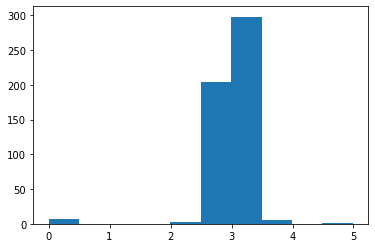

In [22]:
plt.hist(channel_noise)

In [23]:
cellids = sorted(vcd.get_cell_ids())
coords = vcd.get_electrode_map()

In [24]:
for cell in cellids:
    print(cell)
    print(vcd.get_cell_type_for_cell(cell))

36
OFF parasol
48
ON parasol
153
OFF parasol
227
weak
257
ON midget
259
OFF parasol
362
ON midget
427
crap
573
weak
577
crap
578
crap
586
ON parasol
591
OFF midget
695
ON unsure
710
weak
737
ON unsure
766
ON midget
826
ON midget
832
crap
916
ON midget
946
weak
977
ON parasol
1174
OFF parasol
1186
ON midget
1231
weak
1322
ON parasol
1323
OFF parasol
1337
ON midget
1366
weak
1383
ON unsure
1491
crap
1577
weak
1655
OFF parasol
1681
OFF parasol
1696
ON midget
1803
ON midget
1878
OFF parasol
1882
OFF unsure
1906
crap
1968
ON unsure
1981
weak
2011
ON midget
2012
OFF parasol
2089
ON parasol
2207
ON midget
2416
ON midget
2492
ON midget
2521
ON midget
2554
crap
2566
ON midget
2611
crap
2656
ON unsure
2673
ON midget
2701
ON midget
2762
ON unsure
2764
OFF parasol
2783
OFF parasol
2825
weak
2944
ON parasol
3031
ON midget
3061
ON parasol
3198
off array
3212
OFF parasol
3331
ON midget
3352
OFF parasol
3378
crap
3379
OFF parasol
3411
crap
3421
ON midget
3527
weak
3528
crap
3571
weak
3632
crap
3637
cr

In [25]:
len(cellids)

165

In [26]:
thr_factor = 4

In [34]:
cells_of_interest = []
cell_types_of_interest = []

for cell in cellids:
    good_inds, EI = mutils.get_collapsed_ei_thr(vcd, cell, thr_factor)
    good_elecs = good_inds + 1
    if np.any(np.in1d(stim_electrodes, good_elecs)):
        cell_type = vcd.get_cell_type_for_cell(cell)
        if "parasol" in cell_type.lower() or 'midget' in cell_type.lower():
            print(cell)
            print(vcd.get_cell_type_for_cell(cell))
            cells_of_interest.append(cell)
            cell_types_of_interest.append(cell_type)

cells_of_interest = np.array(cells_of_interest)

586
ON parasol
7037
ON parasol
7054
ON midget
7355
OFF parasol


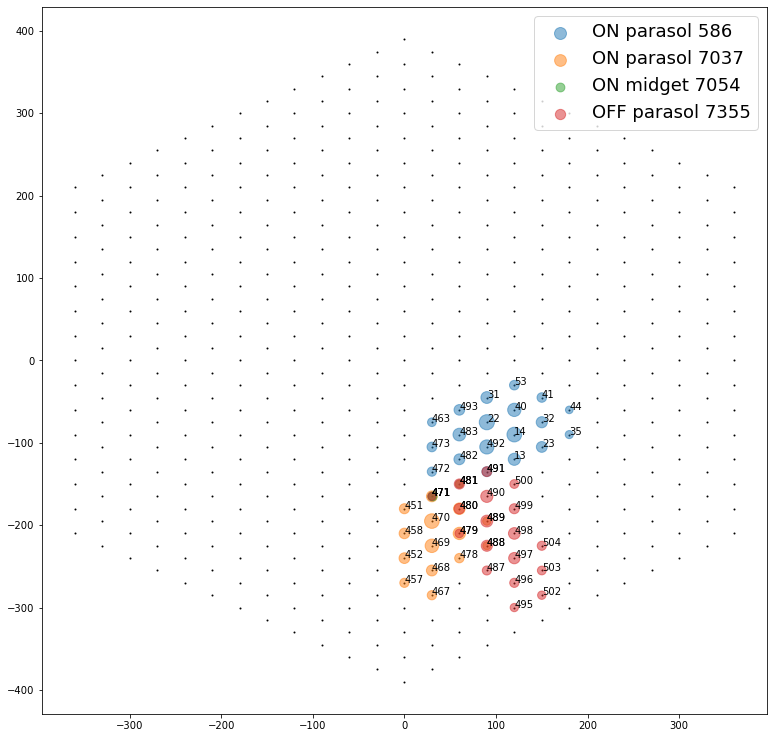

In [28]:
fig, ax = plt.subplots(figsize=(13, 13))
ax.scatter(coords[:, 0], coords[:, 1], s=1, c="k")

for j in range(len(cells_of_interest)):
    #     if True:
    #     if cells_of_interest[j] == 212 or cells_of_interest[j] == 130 or cells_of_interest[j] == 143:
    good_inds, EI = mutils.get_collapsed_ei_thr(vcd, cells_of_interest[j], thr_factor)

    ax.scatter(
        coords[good_inds, 0],
        coords[good_inds, 1],
        s=EI[good_inds] * 5,
        label=cell_types_of_interest[j] + " " + str(cells_of_interest[j]),
        alpha=0.5,
    )
    for i, txt in enumerate(good_inds):
        ax.annotate(txt + 1, (coords[good_inds[i], 0], coords[good_inds[i], 1]))

# ax.axis('off')
ax.legend(fontsize=18, loc="upper right")
plt.show()

In [29]:
stim_electrodes

array([471, 470, 480], dtype=uint16)